In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
mydf=pd.read_csv("covid-variants.csv")

In [4]:
mydf.head

<bound method NDFrame.head of         location        date         variant  num_sequences  perc_sequences  \
0         Angola  2020-07-06           Alpha              0             0.0   
1         Angola  2020-07-06       B.1.1.277              0             0.0   
2         Angola  2020-07-06       B.1.1.302              0             0.0   
3         Angola  2020-07-06       B.1.1.519              0             0.0   
4         Angola  2020-07-06         B.1.160              0             0.0   
...          ...         ...             ...            ...             ...   
100411  Zimbabwe  2021-11-01         Omicron              0             0.0   
100412  Zimbabwe  2021-11-01   S:677H.Robin1              0             0.0   
100413  Zimbabwe  2021-11-01  S:677P.Pelican              0             0.0   
100414  Zimbabwe  2021-11-01          others              0             0.0   
100415  Zimbabwe  2021-11-01         non_who              0             0.0   

        num_sequences

In [6]:
mydf.nunique()


location                121
date                     45
variant                  24
num_sequences          1563
perc_sequences         3600
num_sequences_total    1247
dtype: int64

In [7]:
mydf["variant"].unique()


array(['Alpha', 'B.1.1.277', 'B.1.1.302', 'B.1.1.519', 'B.1.160',
       'B.1.177', 'B.1.221', 'B.1.258', 'B.1.367', 'B.1.620', 'Beta',
       'Delta', 'Epsilon', 'Eta', 'Gamma', 'Iota', 'Kappa', 'Lambda',
       'Mu', 'Omicron', 'S:677H.Robin1', 'S:677P.Pelican', 'others',
       'non_who'], dtype=object)

In [8]:
mydf["location"].unique()


array(['Angola', 'Argentina', 'Aruba', 'Australia', 'Austria', 'Bahrain',
       'Bangladesh', 'Belgium', 'Belize', 'Benin',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Cambodia', 'Cameroon', 'Canada', 'Chile', 'Colombia',
       'Costa Rica', 'Croatia', 'Curacao', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Guatemala', 'Hong Kong', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland',
       'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan',
       'Kenya', 'Kosovo', 'Kuwait', 'Latvia', 'Lebanon', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia',
       'Maldives', 'Malta', 'Mauritius', 'Mexico', 'Moldova', 'Monaco',
       'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Nepal',
       'Netherlands', 'New

In [9]:
mydf.isnull().sum()

location               0
date                   0
variant                0
num_sequences          0
perc_sequences         0
num_sequences_total    0
dtype: int64

In [10]:
mydf.describe()

,num_sequences,perc_sequences,num_sequences_total
count,100416.000000,100416.000000,100416.000000
mean,72.171676,6.154355,1509.582457
std,1669.262169,21.898989,8445.291772
min,0.000000,-0.010000,1.000000
25%,0.000000,0.000000,12.000000
50%,0.000000,0.000000,59.000000
75%,0.000000,0.000000,394.000000
max,142280.000000,100.000000,146170.000000


In [13]:
mydf.dropna(inplace=True)

In [16]:
mydf=mydf.reset_index(drop=True, inplace=False)

In [23]:
mydf['month'] = pd.DatetimeIndex(mydf['date']).month
mydf['month']


0         7
1         7
2         8
3         9
4         9
         ..
16102     9
16103     9
16104    10
16105    10
16106    11
Name: month, Length: 16107, dtype: int64

In [25]:
mydf


,location,date,variant,num_sequences,perc_sequences,num_sequences_total,month
0,Angola,2020-07-06,others,3.0,100.0,3,7
1,Angola,2020-07-06,non_who,3.0,100.0,3,7
2,Angola,2020-08-31,Beta,1.0,100.0,1,8
3,Angola,2020-09-28,Beta,9.0,90.0,10,9
4,Angola,2020-09-28,others,1.0,10.0,10,9
...,...,...,...,...,...,...,...
16102,Zimbabwe,2021-09-06,Delta,14.0,100.0,14,9
16103,Zimbabwe,2021-09-20,Delta,6.0,100.0,6,9
16104,Zimbabwe,2021-10-04,Delta,2.0,100.0,2,10
16105,Zimbabwe,2021-10-18,Delta,5.0,100.0,5,10


In [41]:
Group=mydf.groupby("month")["num_sequences_total"].sum()

In [42]:
A=Group.reset_index()

In [43]:
A

,month,num_sequences_total
0,1,2839950
1,2,3088849
2,3,4535821
3,4,5491615
4,5,6391788
5,6,2198483
6,7,3662993
7,8,5233645
8,9,4141427
9,10,3128272


In [45]:
x=A.month
y=A.num_sequences_total

C:\Users\venna\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


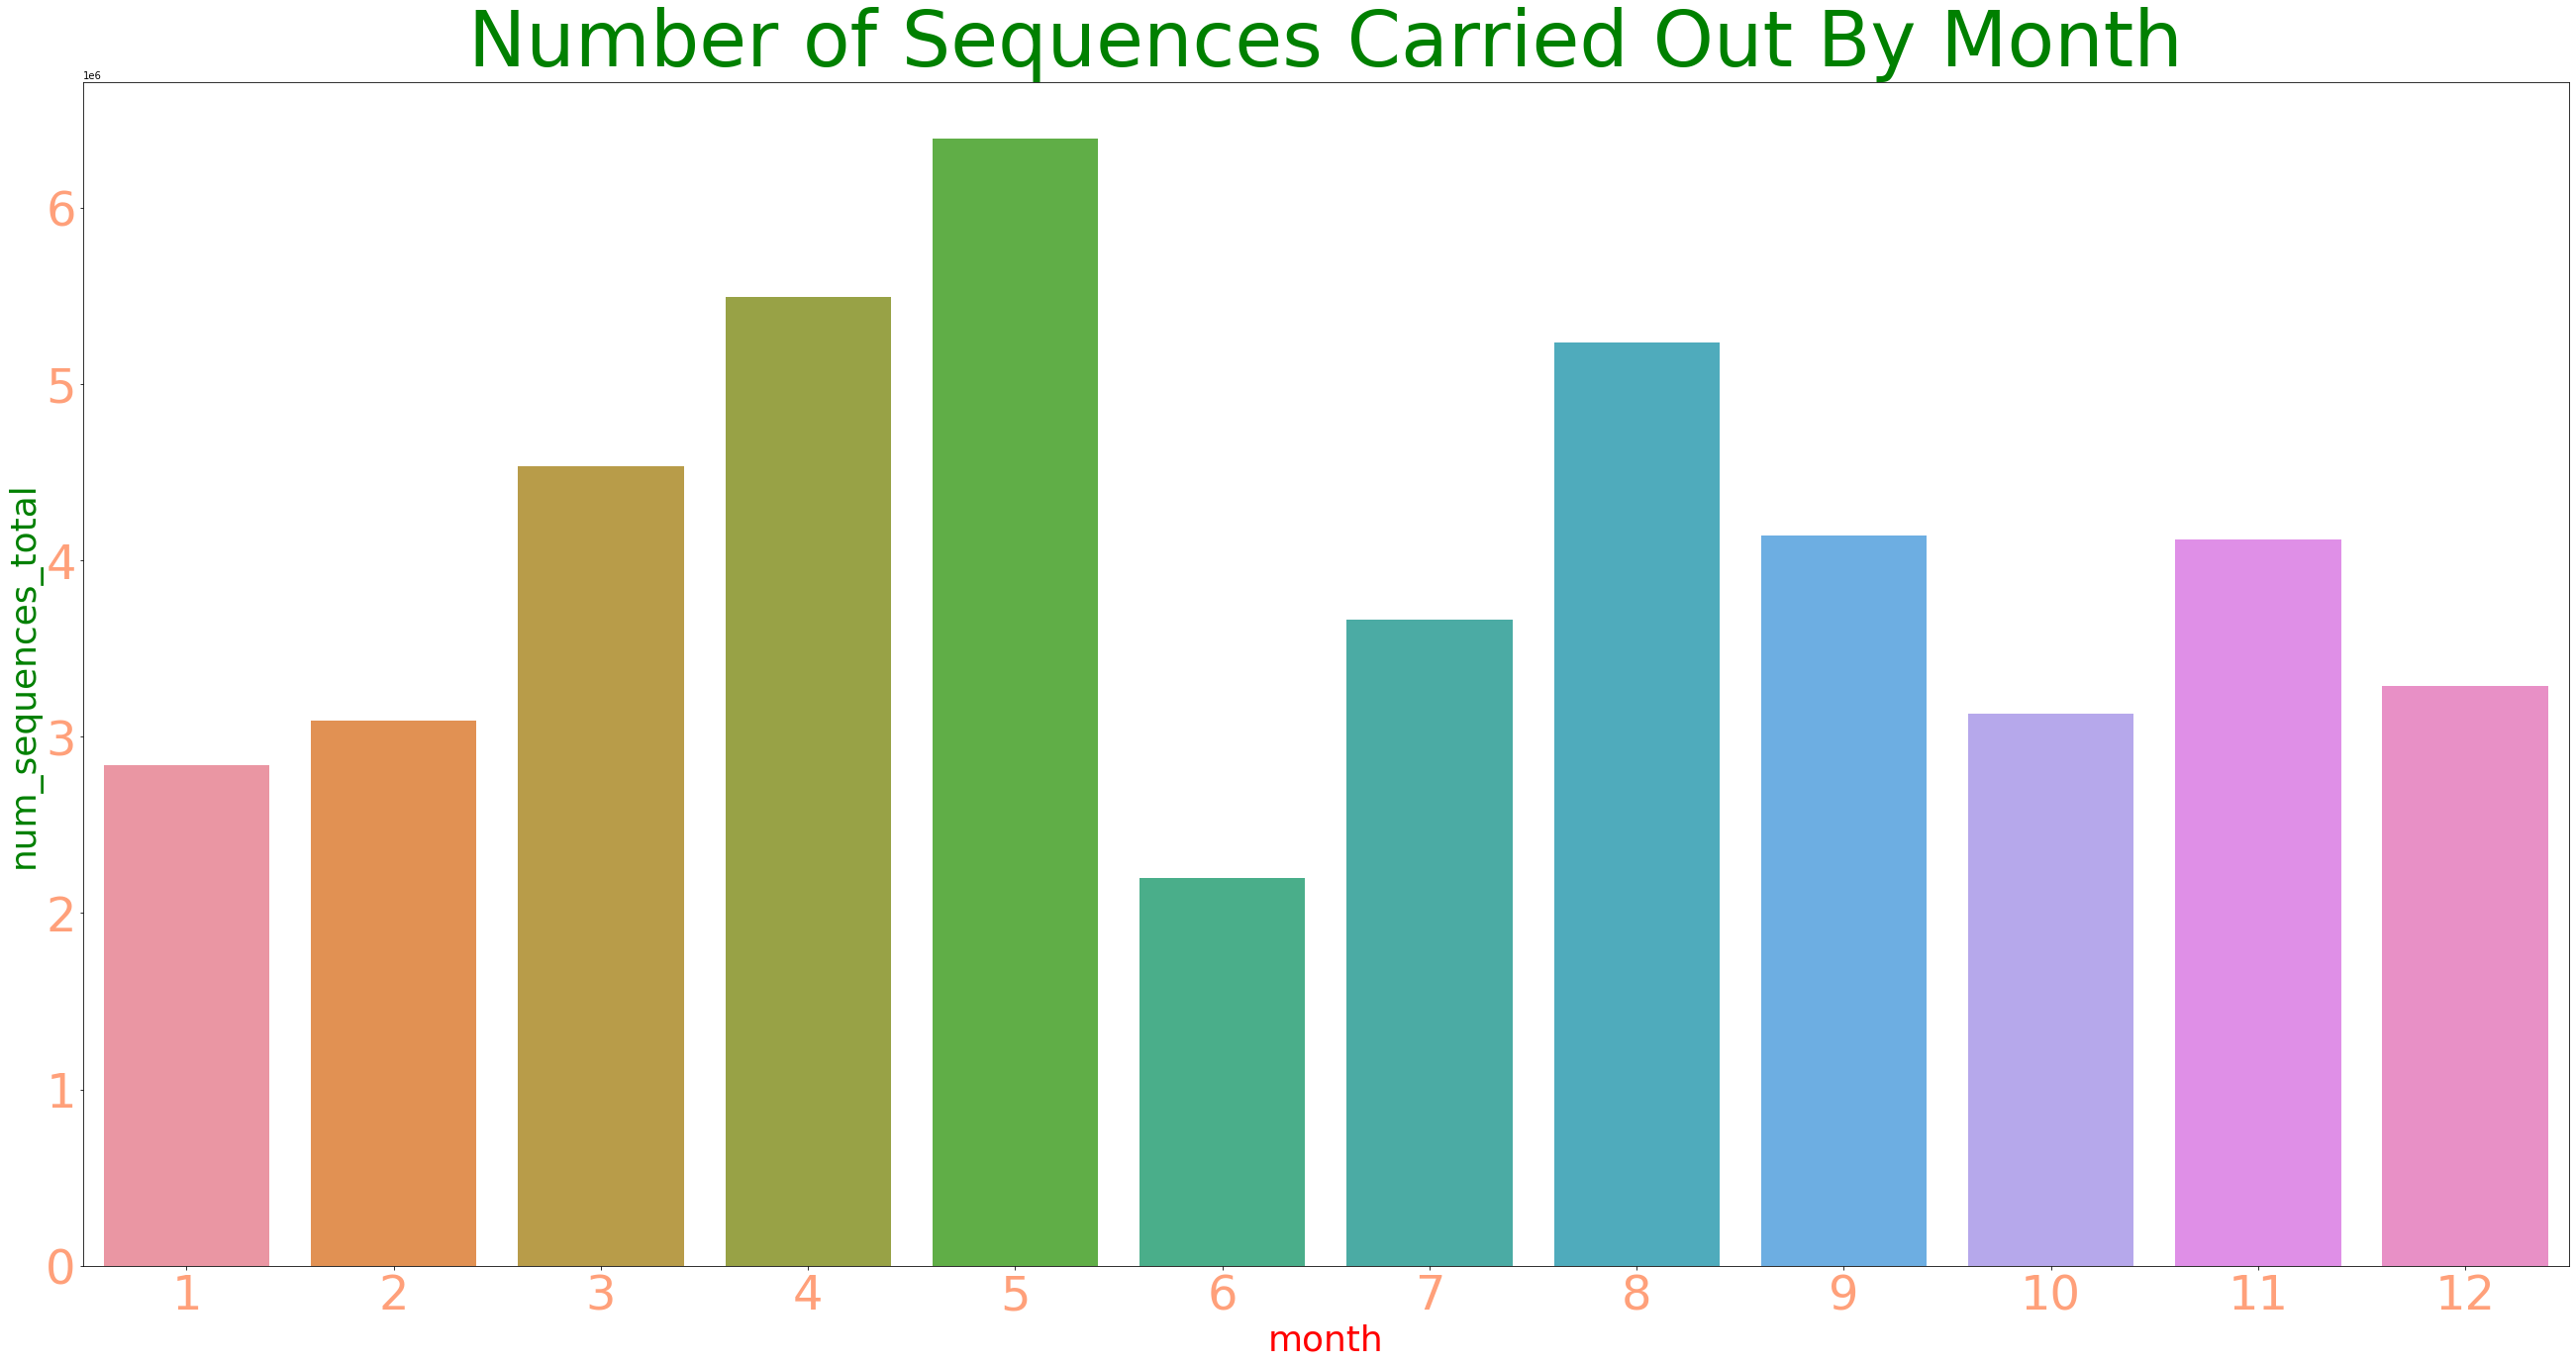

In [46]:
plt.figure(figsize=(45,22))
plt.title("Number of Sequences Carried Out By Month",color="green",fontsize=78)
plt.xlabel("Month",color="red",fontsize=36)
plt.ylabel(" Number of Sequences",color="green",fontsize=36)
plt.xticks(fontsize=48,color="lightsalmon")
plt.yticks(fontsize=48,color="lightsalmon")
sns.barplot(x,y,linewidth=20)
plt.show()

In [47]:
#Conclusion -
#1)As per Above Barchart May month is The most number of sequences carried out by month
#2)April and August are in 2nd And 3Rd places

In [48]:
B=mydf.groupby("variant")["num_sequences_total"].sum()

In [49]:
B=B.reset_index()

In [50]:
B

,variant,num_sequences_total
0,Alpha,4467463
1,B.1.1.277,253682
2,B.1.1.302,186050
3,B.1.1.519,1345842
4,B.1.160,1646049
5,B.1.177,1834775
6,B.1.221,1026854
7,B.1.258,1258033
8,B.1.367,214003
9,B.1.620,738359


In [51]:
x=B.variant
y=B.num_sequences_total

C:\Users\venna\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


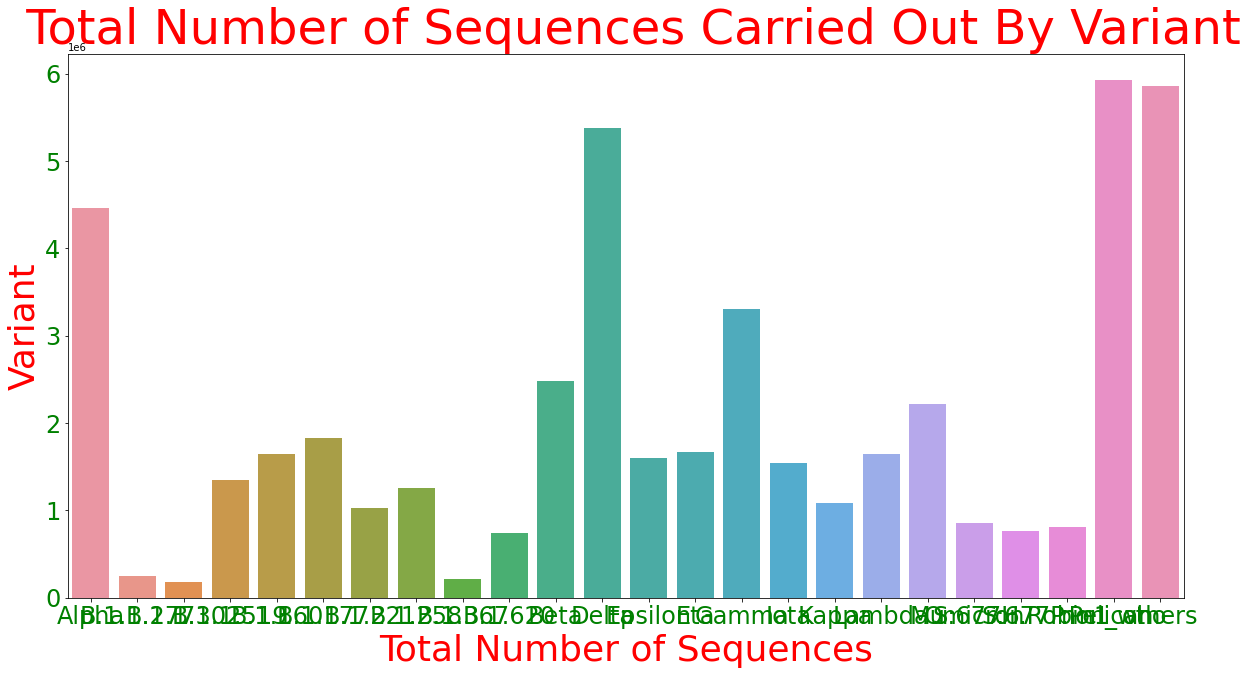

In [54]:
plt.figure(figsize=(20,10))
plt.title(" Total Number of Sequences Carried Out By Variant",color="red",fontsize=48)
plt.xticks(fontsize=24,color="green")
plt.yticks(fontsize=24,color="green")
sns.barplot(x,y)
plt.xlabel("Total Number of Sequences",color="red",fontsize=36)
plt.ylabel("Variant",color="red",fontsize=36)
plt.show()

In [56]:
#Conclusion-
 #The Variants which are having highest number of sequences carried out are :
 #1) non_who=5926742
 #2) others=5856147
 #3) Delta =5378689
 #4) Alpha =4467463
 #5) Gamma =3303256
 #The Above Five Varians are Top Varients


In [60]:
C=mydf.groupby(["location"])["num_sequences_total"].sum()
C=C.reset_index()


In [61]:
C

,location,num_sequences_total
0,Angola,5273
1,Argentina,53592
2,Aruba,13367
3,Australia,122673
4,Austria,65568
...,...,...
116,United States,18883959
117,Uruguay,2186
118,Vietnam,1963
119,Zambia,2455


In [68]:
x=C.location
y=C.num_sequences_total

C:\Users\venna\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


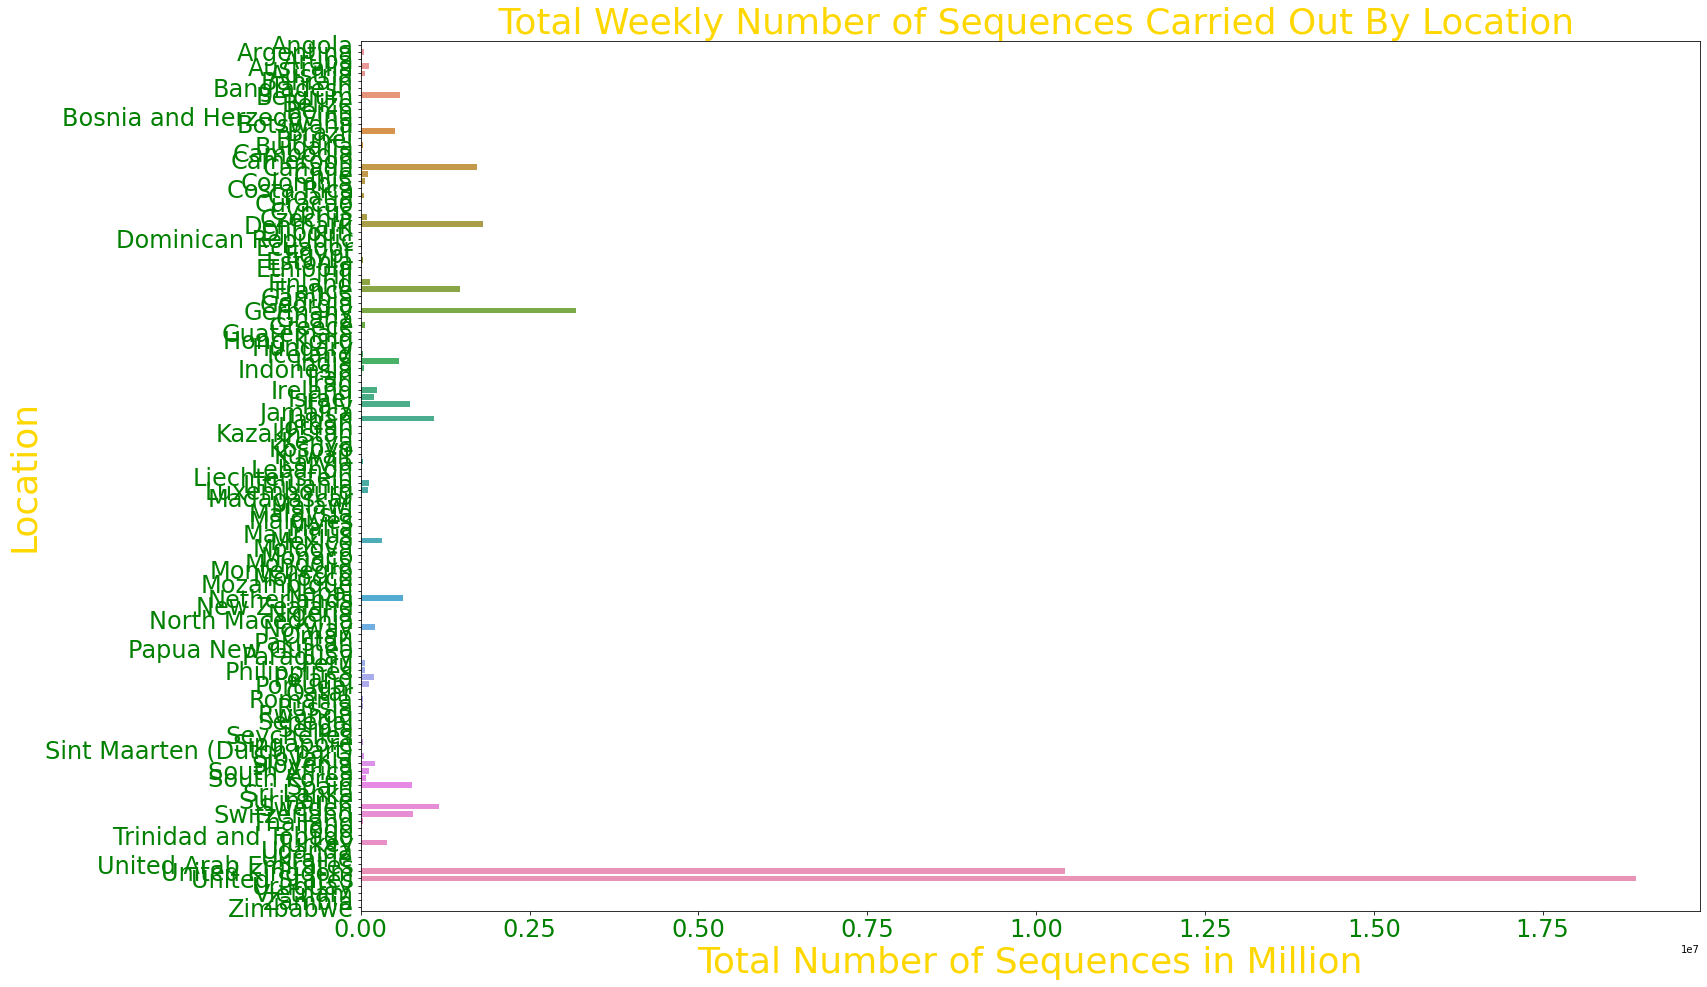

In [70]:
plt.figure(figsize=(24,16))
plt.title(" Total Number of Sequences Carried Out By Location",color="gold",fontsize=36)
plt.xticks(fontsize=24,color="g")
plt.yticks(fontsize=24,color="g")
sns.barplot(y,x)
plt.xlabel("Total Number of Sequences",color="gold",fontsize=36)
plt.ylabel("Location",color="gold",fontsize=36)
plt.show()


In [ ]:
#Top 5 Locations which are having highest number of sequences carried Out
#1) United State=18883959
#2) United Kingdom=10431486
#3) Germany=3184866
#4) Denmark=1810886
#5) Canada=1720914
#This Are the top Five Locations effected ny Covid Variants